# SQLAlchemy Challenge

##### Initial Import of dependencies and making connection to the provided sqlite database
###### Using automap base to save references to the tables in the database 

In [1]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('seaborn')
import numpy as np


engine = create_engine('sqlite:///hawaii.sqlite')
con = engine.connect()

Base = automap_base()
Base.prepare(engine,reflect=True)
Base.classes.keys()

['measurement', 'station']

In [2]:
measurement = Base.classes.measurement
station = Base.classes.station

### Using pandas.read_sql() to load both tables in database into dataframes and view their top 5 rows

In [17]:
sql_m = 'Select * from measurement'
sql_s = 'Select * from station'

measurement_df = pd.read_sql(sql=sql_m, con=con)
station_df = pd.read_sql(sql=sql_s,con=con)
display(measurement_df.tail())
print(measurement_df.info())
display(station_df.head())
station_df.info()

date_grouped = measurement_df.groupby('date')
date = pd.DataFrame(date_grouped['prcp'].count())
display(date.head())
display(measurement_df.loc[measurement_df['date'] == '2010-01-01'])

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB
None


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
id           9 non-null int64
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 512.0+ bytes


,prcp
date,
2010-01-01,7
2010-01-02,7
2010-01-03,7
2010-01-04,7
2010-01-05,6


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
2724,2725,USC00513117,2010-01-01,0.28,67.0
9007,9008,USC00518838,2010-01-01,0.21,72.0
9518,9519,USC00519523,2010-01-01,0.15,75.0
12187,12188,USC00519281,2010-01-01,0.15,70.0
14959,14960,USC00511918,2010-01-01,0.05,66.0
16938,16939,USC00516128,2010-01-01,0.14,73.0


## Converting 'date' column to being a timestamp data type.  
###### Selecting the last 12 months of data in the database and getting the precipitation values for those dates
###### Sorting the df by date then filling the NA values with 0 

In [4]:
measurement_df['date'] = pd.to_datetime(measurement_df['date'])
prcp_df = measurement_df.loc[((measurement_df['date'] >= pd.to_datetime('2016-08-23'))&(measurement_df['date'] <= \
                                                                                       pd.to_datetime('2017-08-23'))),['date','prcp']]
prcp_df = prcp_df.sort_values('date')
prcp_df['prcp'] = prcp_df['prcp'].fillna(0)
prcp_df.head()

,date,prcp
2363,2016-08-23,0.00
8824,2016-08-23,0.00
14607,2016-08-23,1.79
7330,2016-08-23,0.05
5090,2016-08-23,0.15


##### Setting the index of the dataframe to the "date" column, would allow for df.plot with the index automatically plotted as the x-axis.  Decided to go with normal matplotlib plotting for this one for more control of the format

In [5]:
prcp_df.set_index('date',inplace=True)

##### Plotting the precipitation data for the last year of data in the given database 

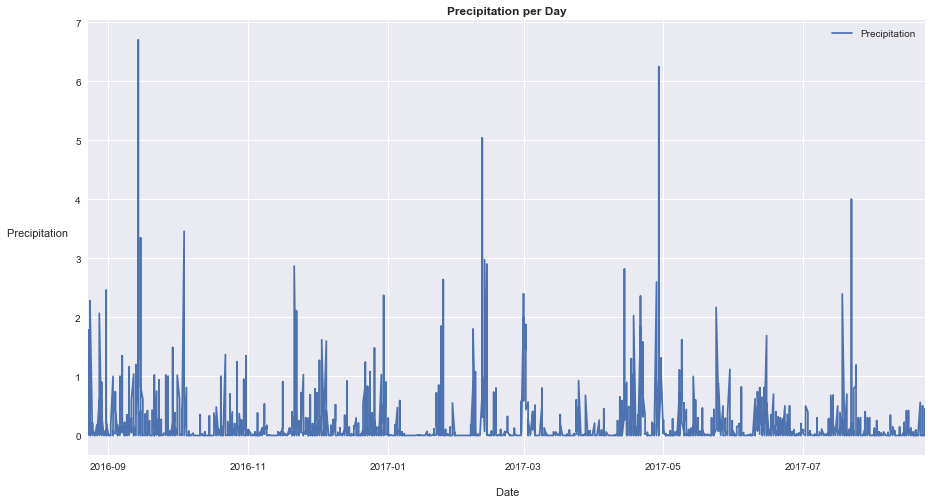

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


f,ax = plt.subplots(figsize=(15,8))
ax.plot(prcp_df.index,prcp_df['prcp'],label='Precipitation')
ax.set_title('Precipitation per Day', fontweight='bold')
ax.set_xlabel('\n Date')
ax.set_ylabel('Precipitation ', rotation='0', ha='right')
ax.set_xlim(pd.to_datetime('2016-08-23'), pd.to_datetime('2017-08-23'))
plt.legend()
plt.show()

### Query for number of stations in the "Station" table 

In [7]:
sql_stations_number = "Select count(distinct(station)) from station"
data = pd.read_sql(sql=sql_stations_number,con=con)
data

,count(distinct(station))
0,9


### Query for most active stations by number of climate data observations

In [8]:
#most active stations
sql_active = '''Select b.station, b.name, count(a.id) as "Number of Observations" 
From measurement a
left join station b
on a.station = b.station
group by b.station, b.name
order by "Number of Observations" desc'''
data = pd.read_sql(sql=sql_active, con=con)
data

,station,name,Number of Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


### Plotting last 12 months of Tempurature data as histogram for the most frequently observed station 

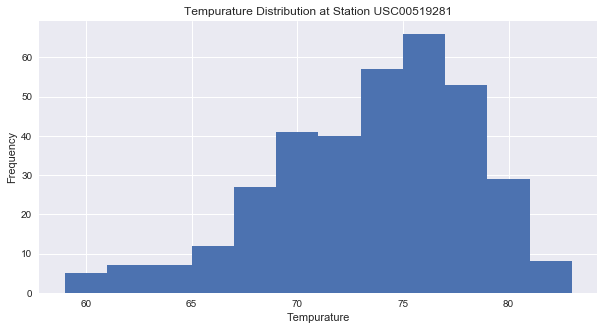

In [9]:
#last 12 months of tobs data for most frequently observed station
import seaborn as sns
tobs_df = measurement_df.loc[((measurement_df['date'] >= pd.to_datetime('2016-08-23'))&(measurement_df['date'] <= pd.to_datetime('2017-08-23'))&(measurement_df['station']=='USC00519281')),'tobs']
tobs_df.plot.hist(bins=12,
                 title='Tempurature Distribution at Station USC00519281',
                 figsize=(10,5))
plt.xlabel('Tempurature')
plt.show()



## Bonus

### Tempurature Analysis 1
###### Comparing the tempuratures in June and December to see if Hawaii weather is truely always nice
Showing histograms of weather data and SEM, and STDDEV in dataframe because the TTest and F_test both have requirements about the distributions and variance in the two samples to provide true statistical analysis.  The means both show to be statistically significantly different as shown by the p vlaues below the graph.  This indicates that the variance in the tempuratures between june and december isn't large enough to account for the difference in mean tempurature, and therefore there is something other than random chance (like global seasonality) that accounts for the difference in the mean tempuratures in the two months.

,tobs,error,stddev
month,,,
1,68.726115,0.105106,4.367892
2,69.442236,0.099225,3.981399
3,70.059067,0.093454,3.845271
4,72.357268,0.087757,3.632131
5,73.680900,0.080611,3.355783
6,74.944118,0.079004,3.257417
7,76.082408,0.081146,3.356532
8,76.412454,0.085741,3.453138
9,76.164865,0.091893,3.535178


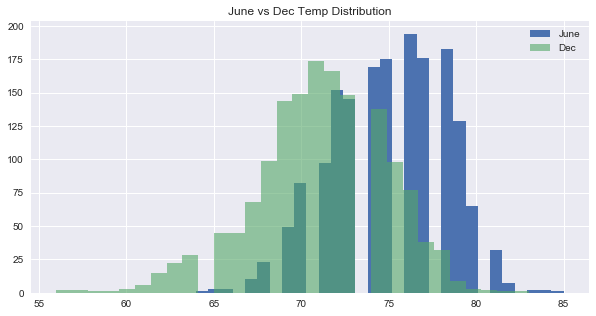

1700 1517
F_onewayResult(statistic=998.7953700363106, pvalue=3.9025129038620835e-191)
Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)


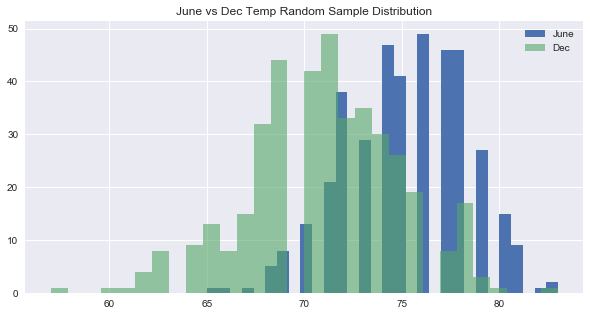

400 400
F_onewayResult(statistic=278.16486565557415, pvalue=8.366732804382399e-54)
Ttest_indResult(statistic=16.678275260217266, pvalue=1.7295302988635156e-53)
Ttest_relResult(statistic=17.003004992359426, pvalue=3.7181995493839184e-49)


In [10]:
from scipy.stats import f_oneway, ttest_ind, ttest_rel

measurement_df['year'] = measurement_df['date'].dt.year
measurement_df['day'] = measurement_df['date'].dt.day

measurement_df['month'] = measurement_df['date'].dt.month
measurements = measurement_df.loc[((measurement_df['year'] <= 2017)),:]
month_group = measurements.groupby('month')
month_df = pd.DataFrame(month_group['tobs'].mean())
month_df['error'] = month_group['tobs'].sem()
month_df['stddev'] = month_group['tobs'].std()


display(month_df)
june = measurements.loc[measurements['month'] == 6,'tobs']
dec = measurements.loc[measurements['month'] == 12,'tobs']

june_samp = june.sample(400)
dec_samp = dec.sample(400)

plt.figure(figsize=(10,5))
plt.hist(june,bins=30,label='June')
plt.title('June vs Dec Temp Distribution')
plt.hist(dec,bins=30,label='Dec',alpha=.6)
plt.legend()
plt.show()



print(len(june),len(dec))
print(f_oneway(june, dec))
print(ttest_ind(june,dec,equal_var=False))

plt.figure(figsize=(10,5))
plt.hist(june_samp,bins=30,label='June')
plt.title('June vs Dec Temp Random Sample Distribution')
plt.hist(dec_samp,bins=30,label='Dec',alpha=.6)
plt.legend()
plt.show()



print(len(june_samp),len(dec_samp))
print(f_oneway(june_samp, dec_samp))
print(ttest_ind(june_samp,dec_samp,equal_var=False))
print(ttest_rel(june_samp,dec_samp))
#not sure how to fix lengh mismatch error 

### Tempurature Analysis 2

###### Average tempurature using data one year back from our "Trip Dates", instructions weren't clear on this.  Just showing average tempurature for a full year of data and error bar as (max temp - min temp) for that year of data

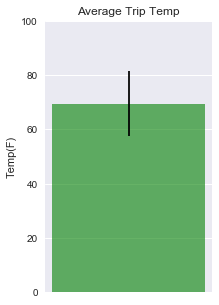

In [11]:
def calc_temps(start,end):
    start_date = pd.to_datetime(start)
    end_date = pd.to_datetime(end)
    data = measurement_df.loc[((measurement_df['date'] >= start) & (measurement_df['date'] <= end)),:]
    min_t = data['tobs'].min()
    max_t = data['tobs'].max()
    avg_t = data['tobs'].mean()
    ptp = max_t - min_t
    return (min_t, max_t, avg_t, ptp)


start = '2017-01-01'
end = '2017-01-01'
min_t, max_t, avg, ptp = calc_temps(start,end)

plt.figure(figsize=(3,5))
plt.bar(0,avg,yerr=ptp,color='g',alpha=.6)
plt.xticks([])
plt.yticks(range(0,101,20))
plt.title('Average Trip Temp')
plt.ylabel('Temp(F)')
plt.show()

### Amount of rainfall per weather station for the last 12 months of available data
###### Only 7 stations with data points with date values within the last 12 months (compared to 9 stations in full data set)

,prcp
station,
USC00517948,4.59
USC00519397,16.09
USC00514830,33.24
USC00519523,38.01
USC00513117,48.51
USC00519281,70.03
USC00516128,147.81


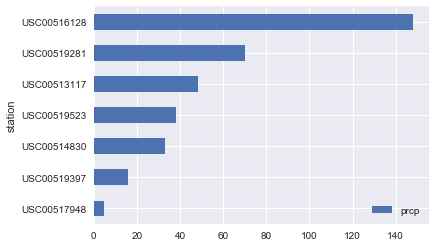

In [12]:
#Calculate the rainfall per weather station using the previous year's matching dates

sql = '''
Select a.prcp, a.tobs, a.date, b.station
From measurement a
left join station b
on a.station = b.station
'''
data = pd.read_sql(sql=sql,con=con)


data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

last_date = data['date'].max()
year_back = last_date - pd.DateOffset(years=1)

df = data.loc[
    ((data['date'] >= year_back) & (data['date'] <= last_date)),
     :
]

station_grouped = df.groupby('station')
rain_df = pd.DataFrame(station_grouped['prcp'].sum())
rain_df = rain_df.sort_values('prcp')
display(rain_df.head(9))

rain_df.plot.barh()
plt.show()

In [13]:
#Calculate daily normals  (doing for all years in dataset) 

day_grouped = data.groupby('day')
day_norm = pd.DataFrame(day_grouped['tobs'].mean())
day_norm['TMAX'] = day_grouped['tobs'].max()
day_norm['TMIN'] = day_grouped['tobs'].min()
day_norm.rename(columns={
    'tobs':'TAVG'
},inplace=True)
day_norm

,TAVG,TMAX,TMIN
day,,,
1,72.901869,83.0,56.0
2,73.009288,84.0,53.0
3,73.151145,87.0,55.0
4,73.080495,84.0,57.0
5,72.722910,84.0,56.0
6,72.736196,83.0,58.0
7,72.446677,83.0,57.0
8,72.541667,86.0,56.0
9,72.723926,84.0,57.0


### Plotting daily norms for a list of dates as a "trip".  Using all days in the historic data set to calculate these daily norms 

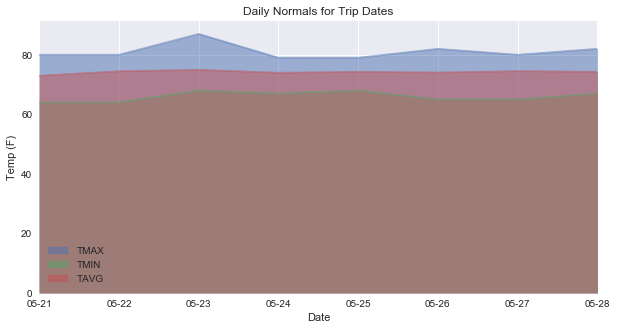

In [14]:
def day_norm(date):
    date_format = pd.to_datetime(date,format='%m-%d')
    day = date_format.day
    month = date_format.month
    data_day = data.loc[(data['month']==month)&(data['day'] == day),:]
    max = data_day['tobs'].max()
    min = data_day['tobs'].min()
    avg = data_day['tobs'].mean()
    return (max,min,avg)


trip_list = ['05-21',
            '05-22',
            '05-23',
            '05-24',
            '05-25',
            '05-26',
            '05-27',
            '05-28']


max_t = []
min_t = []
avg_t = []

for date in trip_list:
    max, min, avg = day_norm(date)
    max_t.append(max)
    min_t.append(min)
    avg_t.append(avg)
    
df = pd.DataFrame(zip(trip_list,max_t,min_t,avg_t), columns=['Date','TMAX','TMIN','TAVG']).set_index('Date')
df.plot.area(stacked=False,
            figsize=(10,5))
plt.ylabel('Temp (F)')
plt.title('Daily Normals for Trip Dates')
plt.show()